# Exercício 11

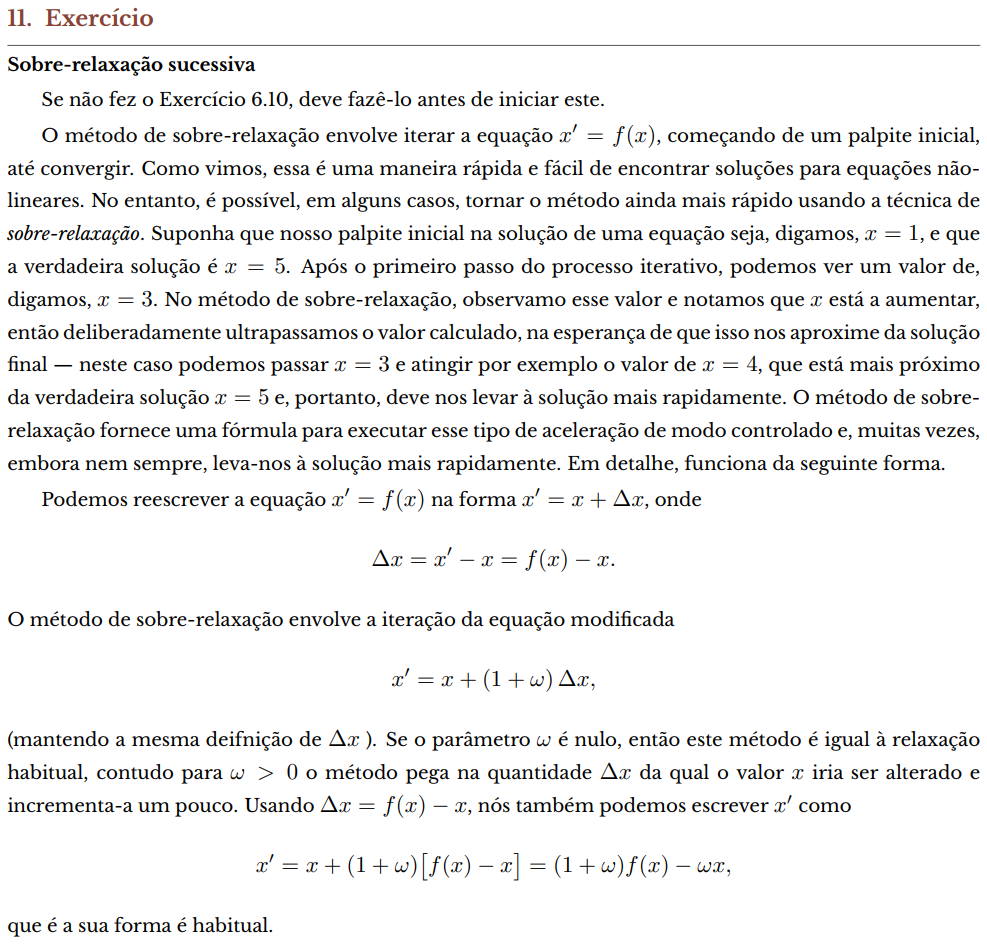
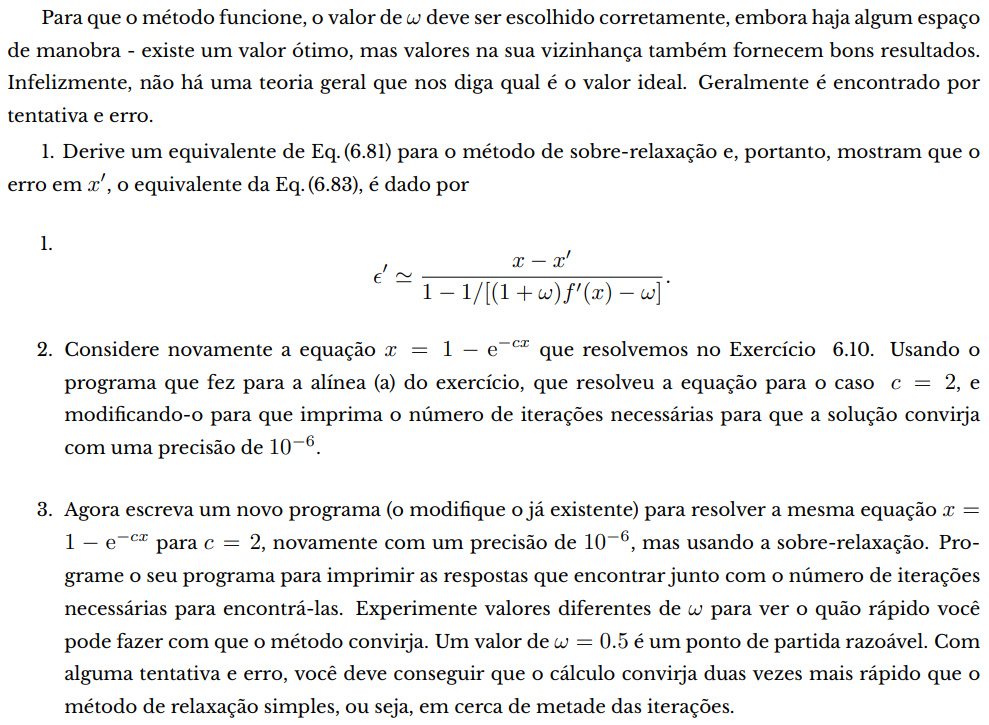
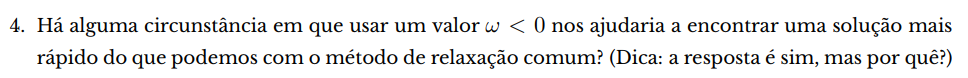

In [21]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

## Alínea 1

[Aqui](https://www.notion.so/guilhermebaos/13-M-todo-da-Relaxa-o-9f1c307a29914ca99cc6fd920bfd14f8?pvs=4#99fc967c6e27426e98ec5a1da0e6197c).

## Alínea 2

In [22]:
def relax(func: Callable, x0: float | np.ndarray, eps: float = 1e-6, maxI: int = 1000) -> (float | np.ndarray):
    """
        Resolve a equação `func(x) = x` usando o método da relaxação começando com a estimativa `x0` e parando quando o erro for menor que `eps` fazendo no máximo `maxI` iterações.

        O erro para várias variáveis é medido como sendo a distância entre duas estimativas consecutivas.

        ### Argumentos
        func: Uma função que aceita um array de `N` elementos e devolve um array de `N` elementos.
        x0: Um array de `N` elementos a usar como primeira estimativa.
        eps: Erro máximo permitido pelo método.
        maxI: Número máximo de iterações, se for ultrapassado o método levanta uma exceção.

        ### Retorno
        x: Float ou array de `N` elementos que soluciona a equação.
    """

    # Número de variáveis
    N = 1 if len(np.array(x0).shape) == 0 else len(np.array(x0))

    # Início do algoritmo
    i = 0
    erro = eps + 1

    x1 = func(x0)
    while abs(erro) > eps:

        # Dar um passo
        x2 = func(x1)

        # Estimar o erro
        if N == 1:
            erro = ((x1 - x2)**2) / (2 * x1 - x0 - x2)
        else:
            erro = np.linalg.norm(x2 - x1)
            

        # Próximo passo
        x0 = x1
        x1 = x2

        # Número de iterações
        i += 1
        if i > maxI:
            raise ValueError(f"Não foi possível encontrar a solução com a precisão desejada com menos de maxI = {maxI} iterações!")
    
    return x1

In [23]:
def problema(c: float) -> Callable:
    return lambda x: 1 - np.exp(-c * x)


# Função a resolver
f = problema(2)

# Solução
print(relax(f, 1))

0.7968126311118457


In [24]:
def overrelax(func: Callable, x0: float | np.ndarray, omega: float = 0.5, eps: float = 1e-6, maxI: int = 1000) -> float:
    """
        Resolve a equação `func(x) = x` usando o método da relaxação com parâmetro `omega` começando com a estimativa `x0` e parando quando o erro for menor que `eps` fazendo no máximo `maxI` iterações.

        O erro para várias variáveis é medido como sendo a distância entre duas estimativas consecutivas.

        ### Argumentos
        func: Uma função que aceita um array de `N` elementos e devolve um array de `N` elementos.
        x0: Um array de `N` elementos a usar como primeira estimativa.
        eps: Erro máximo permitido pelo método.
        maxI: Número máximo de iterações, se for ultrapassado o método levanta uma exceção.

        ### Retorno
        x: Float ou array de `N` elementos que soluciona a equação.
    """

    # Número de variáveis
    N = 1 if len(np.array(x0).shape) == 0 else len(np.array(x0))
    
    # Início do algoritmo
    i = 0
    erro = eps + 1

    x1 = func(x0)
    while abs(erro) > eps:
        
        # Dar um passo
        x2 = (1 + omega) * func(x1) - omega * x1

        # Estimar o erro
        if N == 1:
            erro = (x1 - x2) / (1 - 1/((1 + omega) * (x1 - x2)/(x0 - x1) - omega))
        else:
            erro = np.linalg.norm(x2 - x1)

        # Próximo passo
        x0 = x1
        x1 = x2

        # Número de iterações
        i += 1
        if i > maxI:
            raise ValueError(f"Não foi possível encontrar a solução com a precisão desejada com menos de maxI = {maxI} iterações!")
    
    print(f"Último passo foi de {abs(x1 - x0)}")
    print(f"Resolvido em {i} passos.")
    return x1

In [25]:
# Solução
print(overrelax(f, 1, omega=0.7))

Último passo foi de 2.2475341199257315e-07
Resolvido em 4 passos.
0.7968121320603145
